# Objective

The objective of this program is to clean the dataset, extract features and target, and export the data.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
df = pd.read_csv('Preprocess Data.csv')

In [89]:
df.head()

,Product Name,Discounted Price,Original Price,Warranty,Stock Status,4k,UHD,Smart,LED,Ultra HD,...,OLED,QLED,HDR,PRO,Slim,Curved,8k,Theatre,Dynamic Range,Screen Size
0,Philips 32PHT4002/98 32-inch 4000 Series Slim ...,699,799,2 Years,In stock,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,32
1,Toshiba 43-inch Smart LED TV,"1,399.00","1,645.00",2 Years,In stock,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,43
2,Sony 32-inch LED TV,989,"1,036.00",2 Years,In stock,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,32
3,Sony 40-inch Full HD LED TV,"1,299.00","1,444.00",2 Years,In stock,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,40
4,Toshiba 49-inch Full HD LED TV,"1,499.00","2,299.00",2 Years,In stock,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,49


In [90]:
'''
Combine UDH and Utra HD column in one column
'''
df['Ultra-HD'] = df['Ultra HD'] + df['UHD']

In [91]:
df.drop('UHD', axis=1, inplace=True)

In [92]:
df.drop('Ultra HD', axis=1,inplace=True)

In [93]:
def clean_currency(price):
    try:
        price=price.split('.')[0].split(',')
        return ''.join(price)
    except:
        return price

In [94]:
df['Discounted Price'] = df['Discounted Price'].apply(clean_currency)
df['Discounted Price'] = df['Discounted Price'].apply(int)
df['Original Price'] = df['Original Price'].apply(clean_currency)
df['Original Price'] = df['Original Price'].apply(int)

In [95]:
def clean_warranty(year):
    yr = year.split(' ')[0]
    return int(yr)

In [96]:
df['Warranty'] = df['Warranty'].apply(clean_warranty)

In [97]:
features = df.drop('Discounted Price',axis=1)
features = features.drop('Original Price',axis=1)
features = features.drop('Product Name', axis=1)
features = features.drop('Stock Status', axis=1)

discounted_price = df['Discounted Price']
original_price = df['Original Price']

# Conclusion

Now that I have a clean data it is time to apply Machine Learning Model for indepth analysis.

In [86]:
'''
Exporting the Dataset
'''
import pickle

pickle_out = open('features.pickle','wb')
pickle.dump(features,pickle_out)
pickle_out.close()


pickle_out = open('discounted_price.pickle','wb')
pickle.dump(discounted_price,pickle_out)
pickle_out.close()

pickle_out = open('original_price.pickle','wb')
pickle.dump(original_price,pickle_out)
pickle_out.close()

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# print the intercept
print(lm.intercept_)

-1044.7861822653167


In [68]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])


In [69]:
coeff_df['Coefficient'].sort_values(ascending = False)

8k                4734.125568
QLED              1296.791884
Theatre           1167.739350
Warranty           938.434229
4k                 872.971203
Full HD            702.636362
LED                676.826832
Smart              328.580148
Ultra-HD           317.325673
Curved             245.890093
Original Price       0.896893
Screen Size        -47.406450
Slim              -189.015873
HDR               -272.618472
Dynamic Range     -360.341787
Android           -469.576801
PRO              -1038.167981
OLED             -2743.312273
Name: Coefficient, dtype: float64

In [21]:
coeff_df['Coefficient']

Original Price       0.832659
4k                 654.448960
Smart              274.630510
LED                 99.796380
Full HD            513.122870
Android           -844.223467
OLED             -1598.842960
QLED              2644.583369
HDR                264.414903
PRO               -783.278880
Slim               -68.307260
Curved             267.601839
8k                5406.039244
Theatre           1112.736379
Dynamic Range      200.869774
Screen Size        -53.370944
Ultra-HD           428.334479
Name: Coefficient, dtype: float64

In [22]:
lm.coef_.shape

(17,)

In [23]:
predictions = lm.predict(X_test)

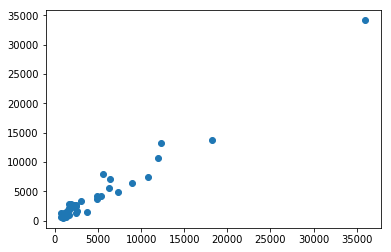

In [24]:
plt.scatter(y_test,predictions)

In [87]:
from sklearn import metrics

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 870.2497361046759
MSE: 1683278.878478789
RMSE: 1297.4123779580605
